In [97]:
import pandas as pd 
import folium 
import matplotlib.pyplot as plt 

In [5]:
# 한국어 설정하기
%matplotlib inline 
plt.rc('font', family = 'AppleGothic')

In [104]:
# 파일 불러오기 
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [4]:
df.head(5)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528


In [13]:
df['시도명']

0          경기도
1        서울특별시
2          경기도
3        부산광역시
4          경기도
         ...  
91330    대전광역시
91331      경기도
91332    부산광역시
91333    서울특별시
91334     충청남도
Name: 시도명, Length: 91335, dtype: object

Q1. 전국 시도별 약국수를 구해주세요!

상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요. 이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다. 각자 구하기 편한 방법을 통해 빈도수를 구합니다.
다음의 결과가 나오도록 구합니다.

In [20]:
# 약국에 관련된 데이터 가져오기 
df1 = df[df['상권업종소분류명'] == '약국']
df1.head(5)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528
10,21057519,민생약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4889046030200780002048274,NaN,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,NaN,NaN,NaN,128.118615,35.575962
15,21006553,상명약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4713010800103400004022515,NaN,경상북도 경주시 금성로 281,780943.0,38156.0,NaN,1,NaN,129.206670,35.842804
16,21026027,햇살약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4117310100111010002005070,샛별한양아파트,경기도 안양시 동안구 달안로 61,431719.0,14043.0,NaN,NaN,NaN,126.948953,37.396502
24,21228644,화정하나로,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4128112300109690000012921,동원텔,경기도 고양시 덕양구 화정로 47,412737.0,10497.0,NaN,3,NaN,126.831406,37.635165


In [21]:
# 전국 시도별 약국수
df1['시도명'].value_counts()

시도명
경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: count, dtype: int64

 Q2. 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다. 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?

빈도수를 구하고 시각화 하여 동물병원이 어느 지역에 많은지 분석해 주세요!
다음의 결과가 나오도록 구합니다.

In [24]:
# 동물병원 관련된 데이터 가져오기 
df2=df[df['상권업종소분류명']=="동물병원"]
df2.head()


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
5,20809147,행신동물병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,4128112800106470014011094,NaN,경기도 고양시 덕양구 행신로 147,412220.0,10517.0,NaN,1,NaN,126.831632,37.619309
12,21145534,목포동물병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,4611010200110500078000665,NaN,전라남도 목포시 영산로 200-1,530806.0,58708.0,NaN,1,NaN,126.390244,34.799439
20,21085006,제일가축병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,4136037021102040012005537,NaN,경기도 남양주시 퇴계원면 경춘북로558번길 7-7,472821.0,12126.0,NaN,1,NaN,127.146600,37.647633
25,21055738,축협동물병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,4671025025103420000000164,NaN,전라남도 담양군 담양읍 삼거리길 8-6,517806.0,57347.0,NaN,1,NaN,126.981972,35.310645
30,20970595,금광종합동물병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,4113110400100970003039318,NaN,경기도 성남시 수정구 산성대로 431,461801.0,13144.0,NaN,1,NaN,127.158972,37.450472


In [30]:
# 전국 시도별  동물병원 수
df2['시도명'].value_counts()

시도명
경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: count, dtype: int64

In [110]:
# '시도명' 열의 빈도수 계산 
value  = df2['시도명'].value_counts()

#빈도수 기준으로 정렬
answer = value.sort_values(ascending = False)

시도명
경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: count, dtype: int64


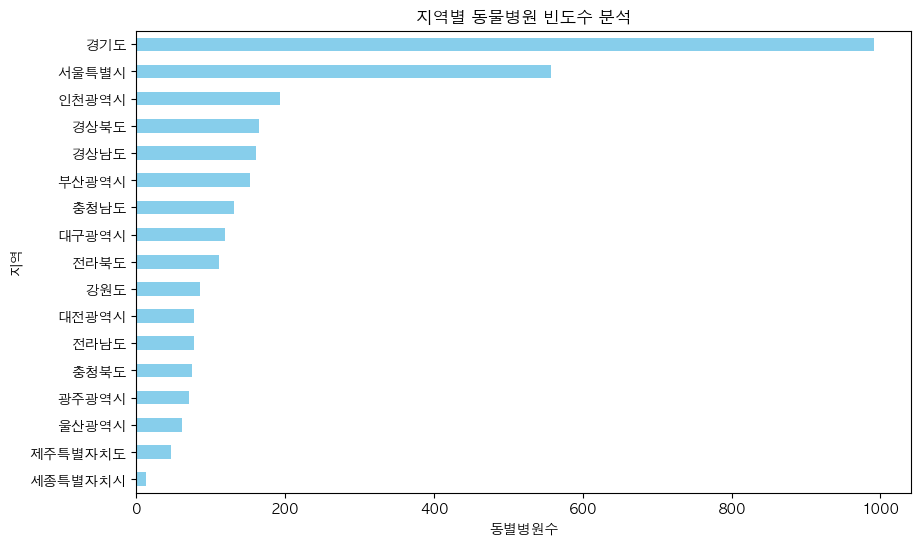

In [112]:
print(df2['시도명'].value_counts())

# 막대차트
plt.figure(figsize=(10,6))
ax = answer.plot(kind='barh',color = 'skyblue')
plt.title("지역별 동물병원 빈도수 분석")
plt.ylabel("지역")
plt.xlabel("동별병원수")

# 큰 막대를 위로 올리기
ax.invert_yaxis()

plt.show()


Q3. 강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다. 실제로 해당 지역에 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 알아보겠습니다.

서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요!
피부과 성형외과 수 / 전체병원 수 로 비율을 구해주세요!
비율이 높은 순서대로 정렬되게 구해주세요!
수업에서 사용한 같은 CSV 파일을 사용하며 다음의 결과가 나오도록 구합니다.
소숫점 두 번째짜리까지 출력하는 방법은 pandas round 로 검색해서 사용법을 알아보세요!

In [35]:
df['시군구명'].value_counts()

시군구명
서구      3165
강남구     3120
남구      2994
중구      2724
북구      2359
        ... 
영양군       16
군위군       14
옹진군       14
미추홀구      13
울릉군        4
Name: count, Length: 228, dtype: int64

In [47]:
# 서울특별시에 관련된 데이터 가져오기 
df3 = df[df['시도명'] == '서울특별시']
df3.head(5)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
8,20808534,코원성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1168010700105920004010990,이가빌딩,서울특별시 강남구 논현로 826,135893.0,6025.0,NaN,4,NaN,127.028531,37.522223
9,20755460,헬로스마일소아과,NaN,S,의료,S01,병원,S01B11,소아과,Q86201,...,1168010800100390018000001,성도빌딩,서울특별시 강남구 논현로131길 30,135010.0,6045.0,NaN,3,NaN,127.027878,37.514144
31,20872995,고운나라성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1174010800100090005004868,NaN,서울특별시 강동구 천호대로 1032,134030.0,5379.0,NaN,3,NaN,127.126507,37.537333
33,20816709,이즈타워약,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1168010100108210001000001,이즈타워,서울특별시 강남구 테헤란로 101,135080.0,6134.0,NaN,1,NaN,127.028023,37.498656


In [70]:
# '피부과' 그리고 '정형/성형외과' 관련 데이터 가져오기 
df4 = df3[(df3['상권업종소분류명'] == '피부과') | (df3['상권업종소분류명'] == '정형/성형외과')]
df4.head(5)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
8,20808534,코원성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1168010700105920004010990,이가빌딩,서울특별시 강남구 논현로 826,135893.0,6025.0,NaN,4,NaN,127.028531,37.522223
31,20872995,고운나라성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1174010800100090005004868,NaN,서울특별시 강동구 천호대로 1032,134030.0,5379.0,NaN,3,NaN,127.126507,37.537333
44,20912401,아미가성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1165010100109020001015305,원등빌딩,서울특별시 서초구 방배로20길 4,137060.0,6664.0,NaN,3,NaN,126.995334,37.485498
94,21859520,새롬성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1156010500104250037035858,NaN,서울특별시 영등포구 경인로 835,150034.0,7305.0,NaN,NaN,NaN,126.905647,37.516310
164,22838864,김종서성형,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1168010700105990004010396,압구정빌딩,서울특별시 강남구 논현로 842,135893.0,6025.0,NaN,2,NaN,127.028712,37.524027


In [93]:
# '시군구명' 열 빈도수 계산 
hospital_counts = df4['시군구명'].value_counts()

# 시군구명 비율 구하기 
value_percent = hospital_counts  / len(df4) 

#소숫점 두 번째짜리까지 출력하기 
value_percent = value_percent.round(2)

print(value_percent )

시군구명
강남구     0.44
서초구     0.15
송파구     0.03
마포구     0.03
영등포구    0.03
강서구     0.03
광진구     0.03
강동구     0.03
중구      0.02
은평구     0.02
서대문구    0.02
성북구     0.02
동대문구    0.02
양천구     0.02
노원구     0.02
중랑구     0.02
성동구     0.01
구로구     0.01
관악구     0.01
동작구     0.01
강북구     0.01
종로구     0.01
용산구     0.01
금천구     0.01
도봉구     0.00
Name: count, dtype: float64


Q4. 평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러분은 실버 의료 산업과 관련된 스타트업에 취업했습니다. 지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보고자 합니다.

folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!
다음과 같이 시각화 하며, folium 의 문서를 참고하여 다른 기능을 사용하여 좀 더 멋지게 지도를 꾸며도 좋습니다.
folium 문서 : https://python-visualization.github.io/folium/quickstart.html

In [95]:
df['상권업종소분류명'].value_counts()

상권업종소분류명
약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
접골원            9
수의업-기타         9
제대혈            1
Name: count, dtype: int64

In [96]:
# '노인/치매병원' 관련 데이터 가져오기 
df5 = df[df['상권업종소분류명'] == '노인/치매병원']
df5.head(5)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
21,21128898,다사랑요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2632010300101360002000001,다사랑요양병원,부산광역시 북구 덕천로 339,616110.0,46610.0,NaN,1,NaN,129.040773,35.209154
62,21511155,노경회,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4623035023110240001000001,NaN,전라남도 광양시 진월면 용소길 7,545851.0,57713.0,NaN,1,NaN,127.746981,34.986585
69,21406385,일산카네이션너싱홈,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4128510200115610001011448,해태쇼핑타운,경기도 고양시 일산동구 중산로 241,410831.0,10336.0,NaN,3,NaN,126.780122,37.693689
79,21403242,은성복지회,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4615010800200220000080503,향림실버빌,전라남도 순천시 조비길 298,540950.0,57922.0,NaN,NaN,NaN,127.460606,34.991014
107,21722929,하은실버홈,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4725033022107880000027997,NaN,경상북도 상주시 낙동면 영남제일로 125-17,742951.0,37251.0,NaN,2,NaN,128.295524,36.365132


In [107]:
center = [36,127]
map = folium.Map(location=center, zoom_start = 7)

# 아이콘 및 색깔 설정하기 
color = {'노인/치매병원': 'blue'}
icon = {'노인/치매병원': 'glyphicon glyphicon-plus-sign'}

# 노인/치매병원 현황 지도 만들기 
for index, row in df5.iterrows():
    iframe = row['상호명'] + ":"+ row['도로명주소']
    popup = popup = folium.Popup(iframe, min_width=300, max_width=200)
    folium.Marker([row['위도'], row['경도']], popup= popup, tooltip = '<strong>여기 클릭하세요</strong>',
                 icon = folium.Icon(icon = icon[row.상권업종소분류명],color = color[row.상권업종소분류명])).add_to(map)
    
map